In [1]:
import torch
from torch import nn

#torchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#matplotlib
import matplotlib.pyplot as plt


In [2]:
device = "gpu" if torch.cuda.is_available() == True else "cpu"

d:\pytorch\.venv\lib\site-packages\torch\cuda\__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
import os 
from helper_functions import walk_through_dir
from pathlib import Path
dir_path = Path("data/archive/")
walk_through_dir(dir_path=dir_path)

There are 3 directories and 2 images in 'data\archive'.
There are 525 directories and 0 images in 'data\archive\test'.
There are 0 directories and 5 images in 'data\archive\test\ABBOTTS BABBLER'.
There are 0 directories and 5 images in 'data\archive\test\ABBOTTS BOOBY'.
There are 0 directories and 5 images in 'data\archive\test\ABYSSINIAN GROUND HORNBILL'.
There are 0 directories and 5 images in 'data\archive\test\AFRICAN CROWNED CRANE'.
There are 0 directories and 5 images in 'data\archive\test\AFRICAN EMERALD CUCKOO'.
There are 0 directories and 5 images in 'data\archive\test\AFRICAN FIREFINCH'.
There are 0 directories and 5 images in 'data\archive\test\AFRICAN OYSTER CATCHER'.
There are 0 directories and 5 images in 'data\archive\test\AFRICAN PIED HORNBILL'.
There are 0 directories and 5 images in 'data\archive\test\AFRICAN PYGMY GOOSE'.
There are 0 directories and 5 images in 'data\archive\test\ALBATROSS'.
There are 0 directories and 5 images in 'data\archive\test\ALBERTS TOWHEE'.


In [4]:
train_dir =dir_path/"train"
test_dir = dir_path/"test"
valid_dir= dir_path/"valid"

In [5]:
import random
from PIL import Image

image_path_list = list(dir_path.glob("*/*/*.jpg"))
image_path_list

[WindowsPath('data/archive/test/ABBOTTS BABBLER/1.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BABBLER/2.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BABBLER/3.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BABBLER/4.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BABBLER/5.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BOOBY/1.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BOOBY/2.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BOOBY/3.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BOOBY/4.jpg'),
 WindowsPath('data/archive/test/ABBOTTS BOOBY/5.jpg'),
 WindowsPath('data/archive/test/ABYSSINIAN GROUND HORNBILL/1.jpg'),
 WindowsPath('data/archive/test/ABYSSINIAN GROUND HORNBILL/2.jpg'),
 WindowsPath('data/archive/test/ABYSSINIAN GROUND HORNBILL/3.jpg'),
 WindowsPath('data/archive/test/ABYSSINIAN GROUND HORNBILL/4.jpg'),
 WindowsPath('data/archive/test/ABYSSINIAN GROUND HORNBILL/5.jpg'),
 WindowsPath('data/archive/test/AFRICAN CROWNED CRANE/1.jpg'),
 WindowsPath('data/archive/test/AFRIC

Random image path: data\archive\train\NORTHERN PARULA\019.jpg
Image class: NORTHERN PARULA
Image height: 224 | Image width: 224


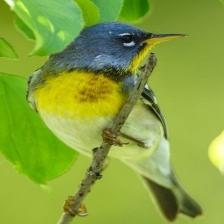

In [6]:
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height} | Image width: {img.width}") 

img

(-0.5, 223.5, 223.5, -0.5)

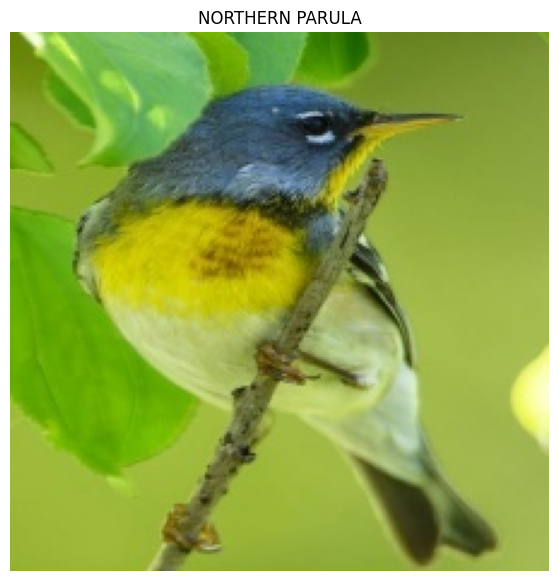

In [7]:
import numpy as np
import matplotlib.pyplot as plt

image_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(image_array)
plt.title(image_class)
plt.axis("off")

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

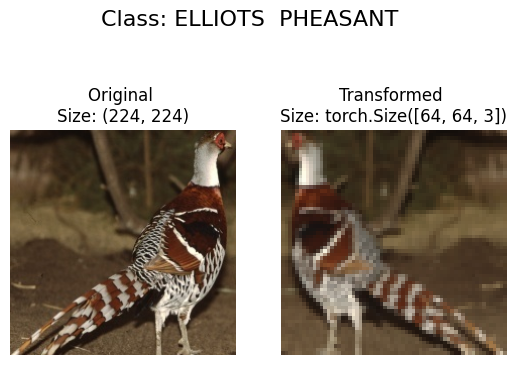

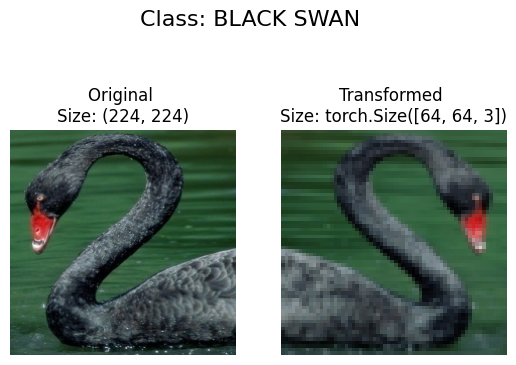

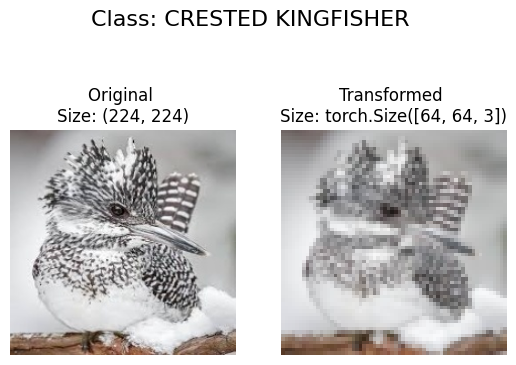

In [10]:
def plot_transformed_images(image_paths, transform, n=3):
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [11]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)

print(f"Train Data: {train_data} \n-------------------\n Test Data: {test_data}")

Train Data: Dataset ImageFolder
    Number of datapoints: 84635
    Root location: data\archive\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) 
-------------------
 Test Data: Dataset ImageFolder
    Number of datapoints: 2625
    Root location: data\archive\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
print(train_data.classes)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

In [13]:
print(train_data.class_to_idx)

{'ABBOTTS BABBLER': 0, 'ABBOTTS BOOBY': 1, 'ABYSSINIAN GROUND HORNBILL': 2, 'AFRICAN CROWNED CRANE': 3, 'AFRICAN EMERALD CUCKOO': 4, 'AFRICAN FIREFINCH': 5, 'AFRICAN OYSTER CATCHER': 6, 'AFRICAN PIED HORNBILL': 7, 'AFRICAN PYGMY GOOSE': 8, 'ALBATROSS': 9, 'ALBERTS TOWHEE': 10, 'ALEXANDRINE PARAKEET': 11, 'ALPINE CHOUGH': 12, 'ALTAMIRA YELLOWTHROAT': 13, 'AMERICAN AVOCET': 14, 'AMERICAN BITTERN': 15, 'AMERICAN COOT': 16, 'AMERICAN DIPPER': 17, 'AMERICAN FLAMINGO': 18, 'AMERICAN GOLDFINCH': 19, 'AMERICAN KESTREL': 20, 'AMERICAN PIPIT': 21, 'AMERICAN REDSTART': 22, 'AMERICAN ROBIN': 23, 'AMERICAN WIGEON': 24, 'AMETHYST WOODSTAR': 25, 'ANDEAN GOOSE': 26, 'ANDEAN LAPWING': 27, 'ANDEAN SISKIN': 28, 'ANHINGA': 29, 'ANIANIAU': 30, 'ANNAS HUMMINGBIRD': 31, 'ANTBIRD': 32, 'ANTILLEAN EUPHONIA': 33, 'APAPANE': 34, 'APOSTLEBIRD': 35, 'ARARIPE MANAKIN': 36, 'ASHY STORM PETREL': 37, 'ASHY THRUSHBIRD': 38, 'ASIAN CRESTED IBIS': 39, 'ASIAN DOLLARD BIRD': 40, 'ASIAN GREEN BEE EATER': 41, 'ASIAN OPENBILL

In [14]:
len(train_data), len(test_data)

(84635, 2625)

In [15]:
img , label = train_data[0][0] , train_data[0][1]
print(f"Image as Tensor: {img}")
print(f"Image Shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image as Tensor: tensor([[[0.9255, 0.9176, 0.8980,  ..., 0.7529, 0.4078, 0.3373],
         [0.9216, 0.9137, 0.8980,  ..., 0.9294, 0.6353, 0.3843],
         [0.9176, 0.9137, 0.9020,  ..., 0.9765, 0.9098, 0.6745],
         ...,
         [0.5412, 0.6235, 0.4588,  ..., 0.2157, 0.1765, 0.1647],
         [0.4627, 0.5765, 0.5333,  ..., 0.2039, 0.1765, 0.1725],
         [0.4431, 0.5098, 0.4392,  ..., 0.2314, 0.1647, 0.1686]],

        [[0.9255, 0.9216, 0.9098,  ..., 0.7333, 0.3765, 0.2902],
         [0.9216, 0.9216, 0.9098,  ..., 0.9020, 0.6118, 0.3451],
         [0.9216, 0.9137, 0.9020,  ..., 0.9490, 0.8824, 0.6510],
         ...,
         [0.6353, 0.6784, 0.4706,  ..., 0.2078, 0.1765, 0.1647],
         [0.5882, 0.6510, 0.5608,  ..., 0.2039, 0.1765, 0.1686],
         [0.5804, 0.5961, 0.4706,  ..., 0.2275, 0.1686, 0.1686]],

        [[0.8902, 0.8745, 0.8510,  ..., 0.6118, 0.2824, 0.2314],
         [0.8745, 0.8627, 0.8431,  ..., 0.8039, 0.4824, 0.2627],
         [0.8667, 0.8549, 0.8353,  ..., 0

In [16]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20edf029c10>,
 <torch.utils.data.dataloader.DataLoader at 0x20edf029eb0>)

In [17]:
img, label = next(iter(train_dataloader))
print(f"Image Shape: {img.shape}")
print(f"Image Label Shape: {label.shape}")

Image Shape: torch.Size([1, 3, 64, 64])
Image Label Shape: torch.Size([1])


In [18]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    
    model.train()
    
    
    train_loss, train_acc = 0, 0
    
   
    for batch, (X, y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)

       
        y_pred = model(X)

        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

       
        optimizer.zero_grad()

       
        loss.backward()

  
        optimizer.step()


        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)


    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):

    model.eval() 
    

    test_loss, test_acc = 0, 0

    with torch.inference_mode():

        for batch, (X, y) in enumerate(dataloader):

            X, y = X.to(device), y.to(device)
    

            test_pred_logits = model(X)


            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [19]:
from tqdm.auto import tqdm


def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
    
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [20]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])


test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [21]:

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 84635
     Root location: data\archive\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2625
     Root location: data\archive\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [22]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20ee12a9dc0>,
 <torch.utils.data.dataloader.DataLoader at 0x20edf029eb0>)

In [31]:
class Food_tinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


In [32]:
model0 = Food_tinyVGG(input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model0

Food_tinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=525, bias=True)
  )
)

In [34]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(), lr=0.001)



model0_results = train(model=model0, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 6.2419 | train_acc: 0.0034 | test_loss: 5.9963 | test_acc: 0.0136
Epoch: 2 | train_loss: 5.8530 | train_acc: 0.0250 | test_loss: 5.2935 | test_acc: 0.0685


In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(model0.results)